# 📊 Analyse et Visualisation du Dataset
## Healthy Lifestyle Predictor

**Projet** : Prédiction du mode de vie sain/malsain  
**Dataset** : `dataset.csv` (300 lignes)  
**Objectif** : Analyser les données et créer des visualisations pour comprendre la distribution des features



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Chargement des données

In [3]:
dataset = pd.read_csv("dataset.csv")

data est charge sous forme de dataframe

In [4]:
type(dataset)

pandas.core.frame.DataFrame

Afficher les colonnes du dataset

In [5]:
dataset.columns

Index(['sleep_hours', 'exercise_minutes', 'screen_time_hours', 'water_glasses',
       'fast_food_per_week', 'healthy'],
      dtype='object')

afficher les types des données 

In [6]:
dataset['healthy'].dtype

dtype('int64')

In [7]:
dataset

,sleep_hours,exercise_minutes,screen_time_hours,water_glasses,fast_food_per_week,healthy
0,6.7,0,11.3,3,5,0
1,6.6,69,9.5,2,8,0
2,5.9,55,10.4,4,4,0
3,8.2,123,5.6,7,0,1
4,8.9,69,10.0,3,5,0
...,...,...,...,...,...,...
295,5.6,37,13.2,4,4,0
296,8.9,99,6.3,7,3,1
297,7.8,153,3.0,8,3,1
298,9.7,63,9.6,4,7,0


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sleep_hours         300 non-null    float64
 1   exercise_minutes    300 non-null    int64  
 2   screen_time_hours   300 non-null    float64
 3   water_glasses       300 non-null    int64  
 4   fast_food_per_week  300 non-null    int64  
 5   healthy             300 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 14.2 KB


verifier si le dataset est equilibre

In [9]:
dataset['healthy'].value_counts()

healthy
0    150
1    150
Name: count, dtype: int64

In [10]:
dataset.describe()

,sleep_hours,exercise_minutes,screen_time_hours,water_glasses,fast_food_per_week,healthy
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,6.917000,91.903333,7.846000,5.083333,3.526667,0.500000
std,1.237085,54.458729,2.521536,2.567430,2.142723,0.500835
min,4.000000,0.000000,2.400000,0.000000,0.000000,0.000000
25%,6.100000,43.750000,6.000000,3.000000,2.000000,0.000000
50%,7.300000,96.000000,7.350000,5.000000,3.000000,0.500000
75%,7.800000,133.250000,9.900000,7.000000,5.000000,1.000000
max,9.700000,220.000000,14.000000,12.000000,10.000000,1.000000


### Configuration du style visuel


In [11]:
sns.set(style="whitegrid")
features = ['sleep_hours', 'exercise_minutes', 'screen_time_hours', 'water_glasses', 'fast_food_per_week']

# 2. Vérification de l'équilibre des classes (Bar chart)

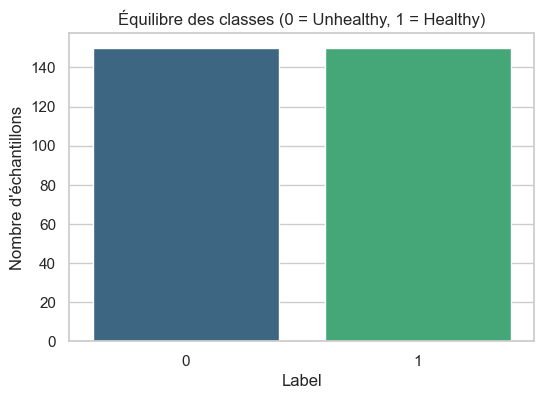

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='healthy', hue='healthy', legend=False, data=dataset, palette='viridis')
plt.title("Équilibre des classes (0 = Unhealthy, 1 = Healthy)")
plt.xlabel("Label")
plt.ylabel("Nombre d'échantillons")
plt.show()

# 3. Distribution des variables par classe (Boxplots)

Permet de voir la différence de médiane et la dispersion pour chaque habitude

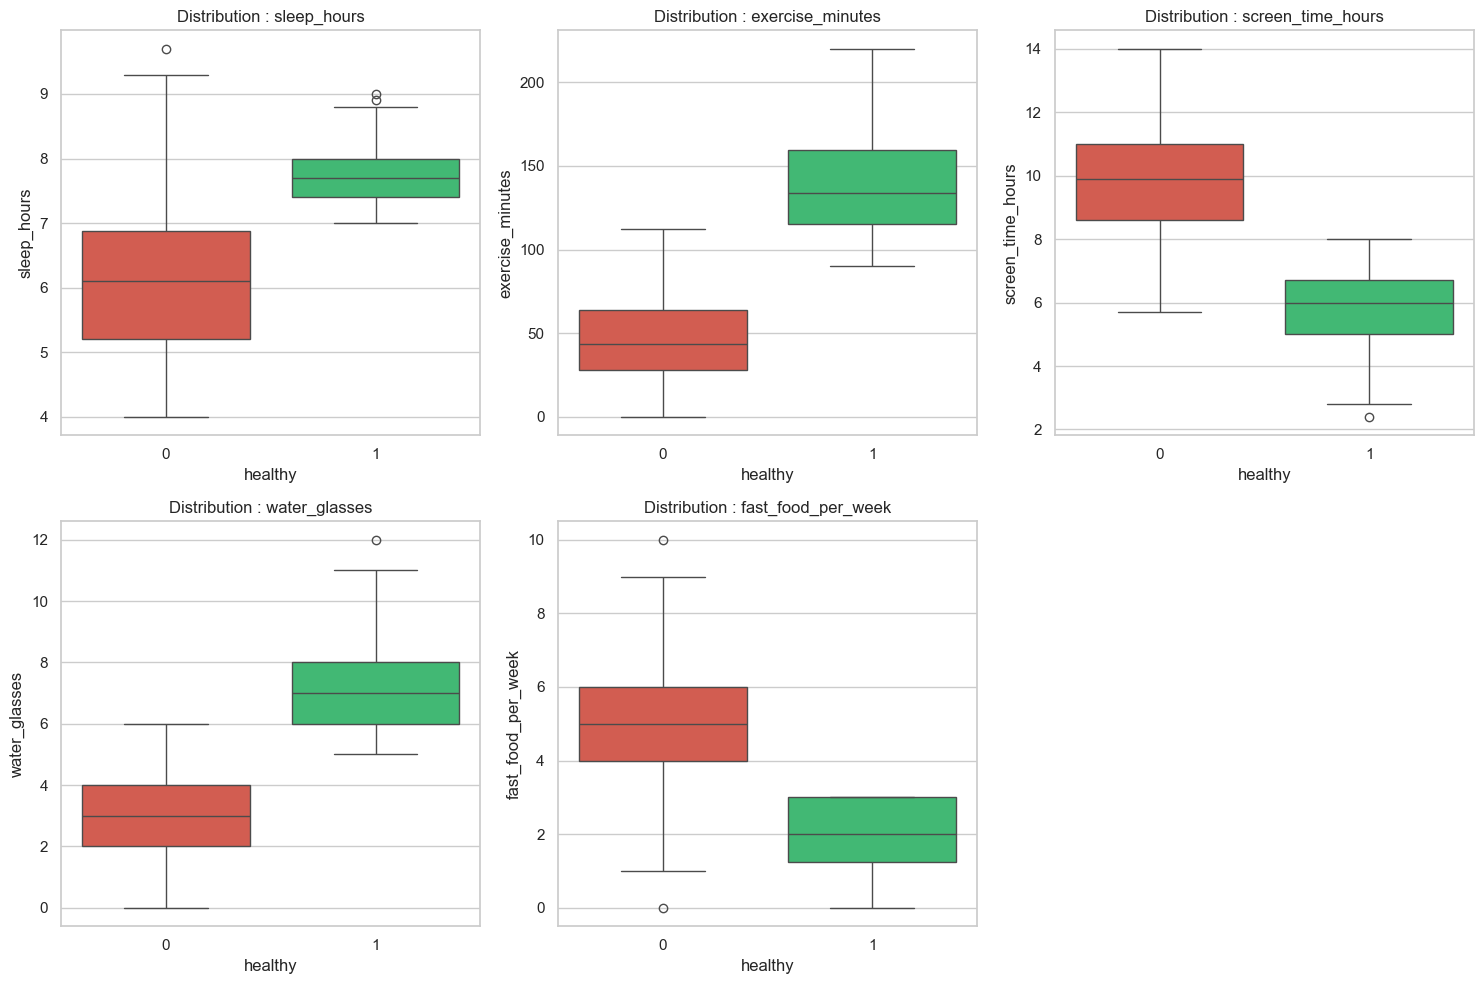

In [13]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    safe_palette = {0: "#e74c3c", 1: "#2ecc71", '0': "#e74c3c", '1': "#2ecc71"}
    sns.boxplot(x='healthy', y=col, hue='healthy', legend=False, data=dataset, palette=safe_palette)
    plt.title(f'Distribution : {col}')
plt.tight_layout()
plt.show()

# 4. Vue d'ensemble des relations (Pairplot)



 Affiche les nuages de points de chaque variable contre les autres
 La diagonale montre la densité de distribution pour chaque classe

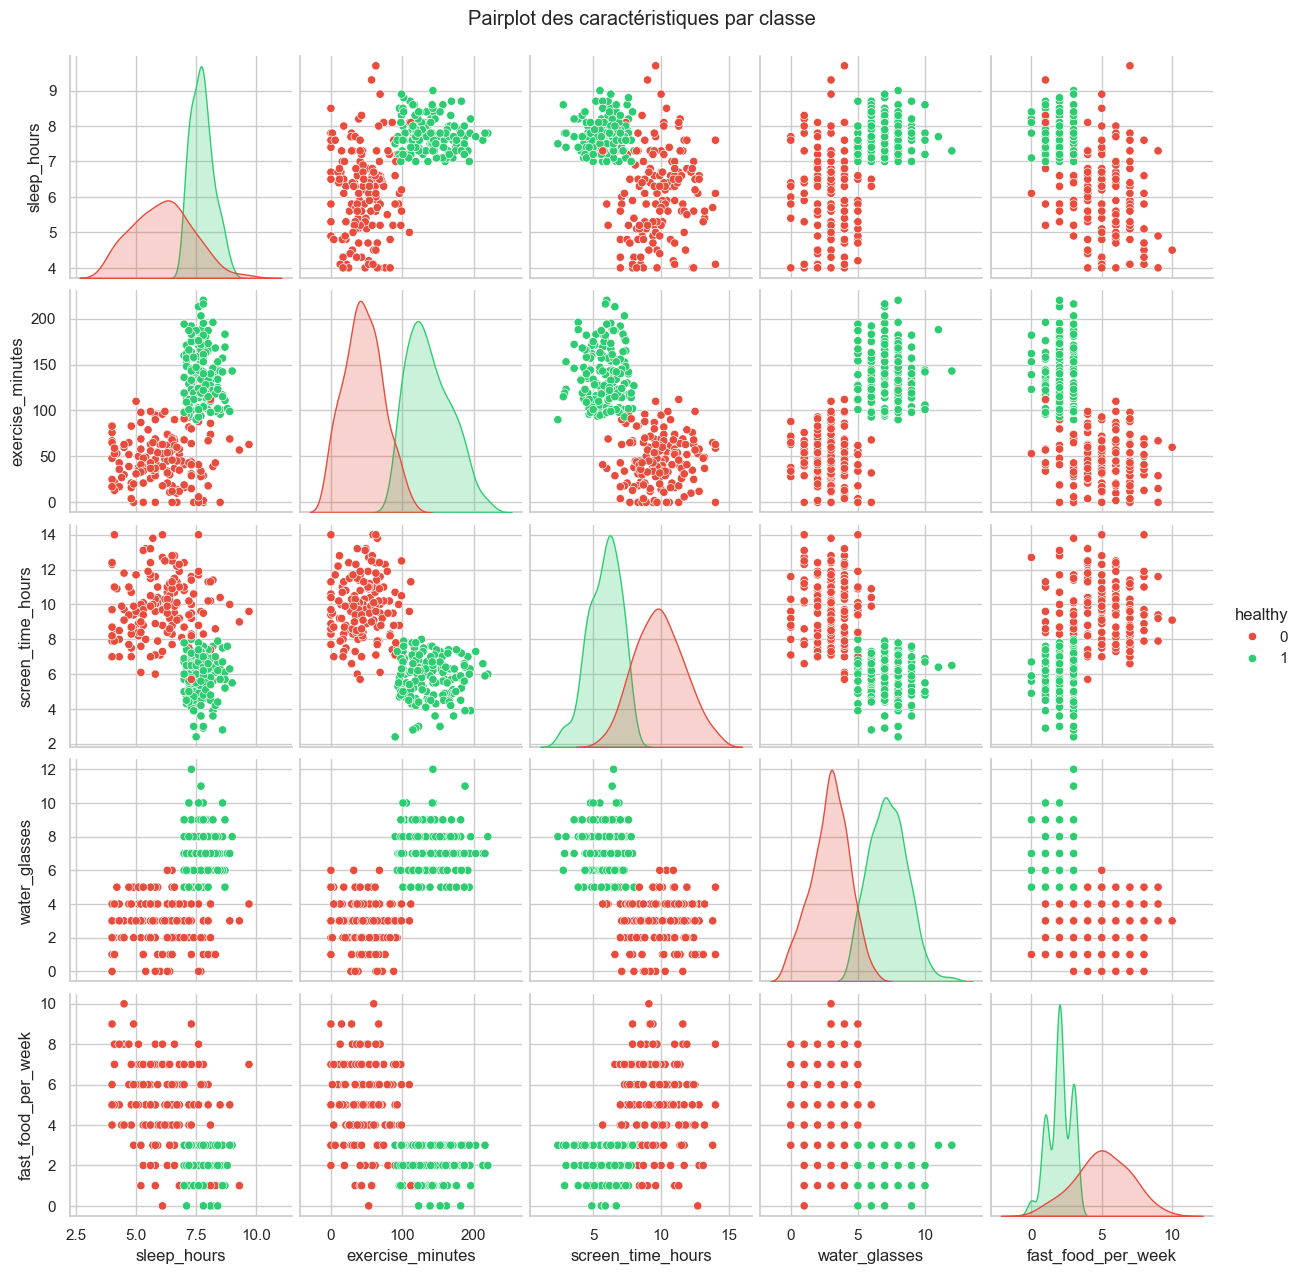

In [14]:
sns.pairplot(
    dataset,
    hue='healthy',
    vars=features,
    palette={0: "#e74c3c", 1: "#2ecc71"}
)
plt.suptitle("Pairplot des caractéristiques par classe", y=1.02)
plt.show()


In [15]:
dataset.corr()

,sleep_hours,exercise_minutes,screen_time_hours,water_glasses,fast_food_per_week,healthy
sleep_hours,1.000000,0.563219,-0.500355,0.561542,-0.571416,0.663686
exercise_minutes,0.563219,1.000000,-0.674677,0.684388,-0.616582,0.851299
screen_time_hours,-0.500355,-0.674677,1.000000,-0.682523,0.546110,-0.802173
water_glasses,0.561542,0.684388,-0.682523,1.000000,-0.595280,0.844015
fast_food_per_week,-0.571416,-0.616582,0.546110,-0.595280,1.000000,-0.713680
healthy,0.663686,0.851299,-0.802173,0.844015,-0.713680,1.000000


# 5. Analyse des Corrélations (Heatmap)

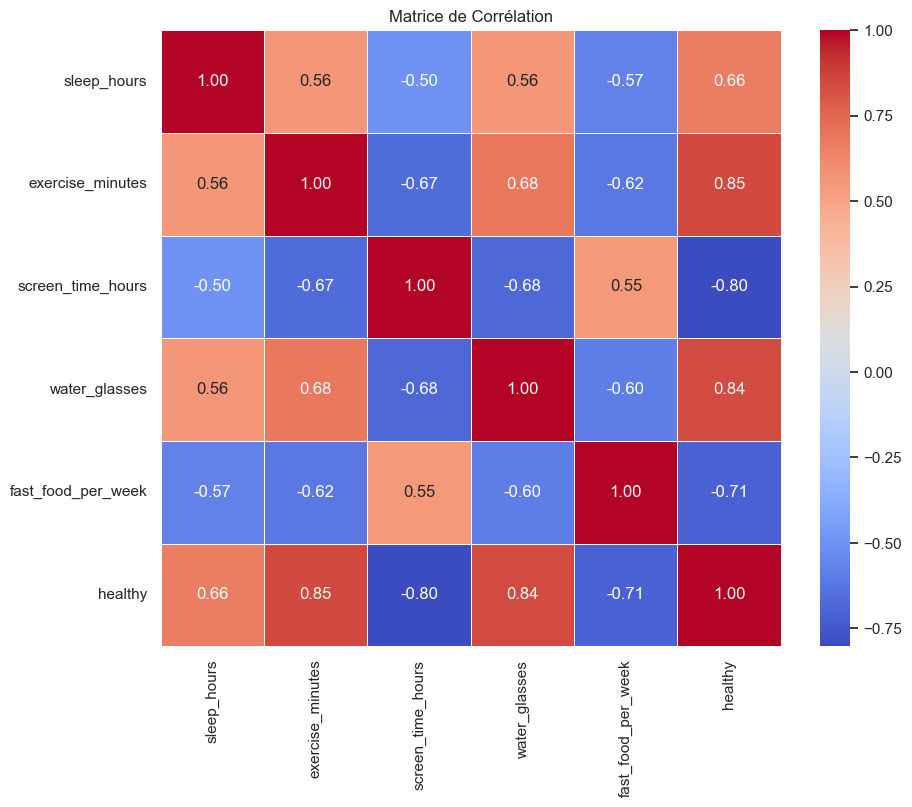

In [16]:
plt.figure(figsize=(10, 8))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()

### 🎯 Prochaine étape :
**Entraîner le modèle de régression logistique from scratch**

---

**Fin de l'analyse** 🎉